<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/CNN_for_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing the libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 2 : Data preprocessing


In [3]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [4]:
# load the dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


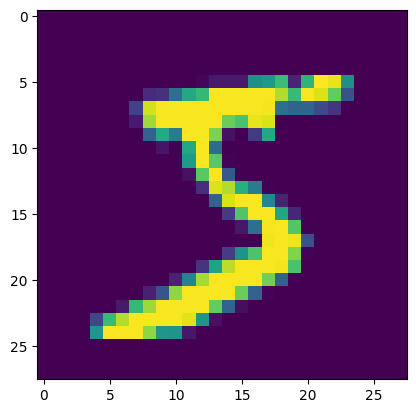

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

5

In [7]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [8]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
x_train.min() , x_train.max(), x_train.mean()

(0, 255, 33.318421449829934)

In [10]:
y_train.min() , y_train.max(), y_train.mean()

(0, 9, 4.4539333333333335)

In [11]:
# normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.min() , x_train.max(), x_train.mean()

(0.0, 1.0, 0.1306604762738429)

In [13]:
# check the shape
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
# reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
x_train.shape, x_test.shape # the images are now in 3-dimension

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
input_shape = x_train[0].shape

In [17]:
print(input_shape)

(28, 28, 1)


# Step 3 : Building the Model

In [18]:
# define an object
model = tf.keras.models.Sequential()

In [19]:
# Add the first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size =(3,3), activation='relu', input_shape=(28, 28, 1)))

# Add the second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), activation='relu'))

# Add the maxpool layer --> it extracts the dominant features and reduces the size of the convol features
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Add the dropout layer

model.add(tf.keras.layers.Dropout(0.4)) # Prevent overfitting

# add the flattening layer
model.add(tf.keras.layers.Flatten())

# add the fully connected layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# output layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax' )) # multiple outputs


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Step 4 : Training the model

In [22]:
history = model.fit(x_train, y_train, batch_size=128, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.3709 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.0507 - val_sparse_categorical_accuracy: 0.9830
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0577 - sparse_categorical_accuracy: 0.9826 - val_loss: 0.0382 - val_sparse_categorical_accuracy: 0.9870
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0285 - val_sparse_categorical_accuracy: 0.9907
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.0314 - val_sparse_categorical_accuracy: 0.9889
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0180 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.0304 - val_sparse_categorical_accuracy: 0.9896
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0154 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.0299 - val_sparse_categorical_accuracy: 0.9909
Ep

In [24]:
# model predictions
y_pred = np.argmax(model.predict(x_test), axis=-1) # replacement for y_pred = model.predict_classes(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
y_pred[15] , y_test[15]

(5, 5)

In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 977    0    0    0    0    0    1    0    0    2]
 [   0 1131    0    2    0    0    2    0    0    0]
 [   2    0 1023    1    3    0    0    2    1    0]
 [   0    0    2 1006    0    1    0    1    0    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    1    0    8    0  879    1    0    1    1]
 [   4    2    0    0    2    2  945    0    3    0]
 [   0    2    6    1    0    0    0 1017    1    1]
 [   1    1    3    2    1    0    0    1  962    3]
 [   0    2    1    1   12    1    0    6    2  984]]


In [32]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9904


# Step 5 : Plotting the learning curve

In [33]:
def learning_curve(history, epoch):
  # training versus validation accuracy
  epoch_range = range(1, epoch +1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model accuracy ')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()



  # training versus validation loss

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()

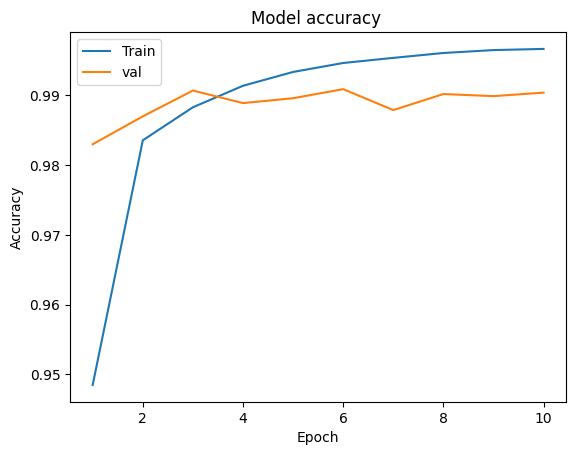

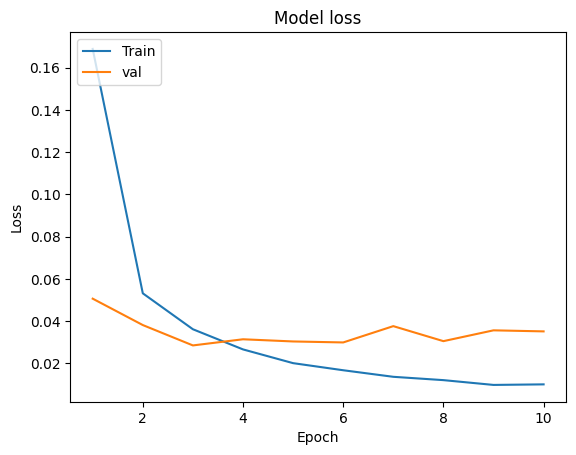

In [34]:
learning_curve(history, 10)